In [3]:
import kagglehub
import pandas as pd
import os
import pandas as pd
from PyPDF2 import PdfReader
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt



/Users/owaiskamdar/Desktop/resume_optimizer/venv311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Download datasets from kaggle
path_jd = kagglehub.dataset_download("vaghefi/indeed-jobs")
path_resumes = kagglehub.dataset_download("sauravsolanki/hire-a-perfect-machine-learning-engineer")

print(f"Job Descriptions Path: {path_jd}")
print(f"Resumes Path: {path_resumes}")


Job Descriptions Path: /Users/owaiskamdar/.cache/kagglehub/datasets/vaghefi/indeed-jobs/versions/1
Resumes Path: /Users/owaiskamdar/.cache/kagglehub/datasets/sauravsolanki/hire-a-perfect-machine-learning-engineer/versions/1


In [130]:
# define roots for jobs
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
RAW_JOBS_PATH = os.path.join(PROJECT_ROOT, "data/raw/jobs")

# Load job descriptions CSV
job_descriptions = pd.read_csv(path_jd + "/indeed_jobs.csv")

# Preview dataset
job_descriptions.head()





,title,description,city,state,zipcode,salary,company,rating,reviews
0,Data Scientist,About Live Objects\nLive Objects delivers cont...,Palo Alto,CA,94301,NaN,LIVE OBJECTS,NaN,NaN
1,"Senior Data Scientist, FP&A","The Senior Data Scientist, FP&A role is primar...",Orrville,OH,44667,NaN,The J. M. Smucker Company,3.8,393.0
2,BI Developer (Tableau),**U.S. Citizens and those authorized to work i...,Charlotte,NC,28202,"$97,000 a year",Vaco,3.7,272.0
3,Search & Information Retrieval Engineer / Scie...,"Summary\nPosted: Jul 29, 2020\nRole Number:200...",Santa Clara Valley,CA,95014,NaN,Apple,4.2,9782.0
4,Machine Learning Engineer,"At Sisu, we're building a software platform th...",San Francisco,CA,NaN,NaN,Sisu,4.4,8.0


In [148]:
# check for duplicates rows
num_duplicates = job_descriptions.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# check for any nulls in the df
job_descriptions[job_descriptions.isnull().any(axis=1)]




Number of duplicate rows: 20


,title,description,city,state,zipcode,salary,company,rating,reviews
0,Data Scientist,About Live Objects\nLive Objects delivers cont...,Palo Alto,CA,94301,NaN,LIVE OBJECTS,NaN,NaN
1,"Senior Data Scientist, FP&A","The Senior Data Scientist, FP&A role is primar...",Orrville,OH,44667,NaN,The J. M. Smucker Company,3.8,393.0
3,Search & Information Retrieval Engineer / Scie...,"Summary\nPosted: Jul 29, 2020\nRole Number:200...",Santa Clara Valley,CA,95014,NaN,Apple,4.2,9782.0
4,Machine Learning Engineer,"At Sisu, we're building a software platform th...",San Francisco,CA,NaN,NaN,Sisu,4.4,8.0
5,Database Administrator,The Database Administrator is responsible for ...,Omaha,NE,NaN,NaN,"Galapagos Federal Systems, LLC",NaN,NaN
...,...,...,...,...,...,...,...,...,...
3191,"Data Scientist, Mars Petcare - Portland, OR",The Petcare Segment consists of five Divisions...,Portland,OR,97212,NaN,Mars,3.9,1790.0
3192,"Artificial Intelligence, Senior Consultant – A...","Artificial Intelligence, Senior Consultant – A...",San Jose,CA,95113,NaN,Deloitte,4.0,9750.0
3193,Data Scientist,Position Description\n\nCGI Federal is seeking...,Baltimore,MD,21203,NaN,"CGI Group, Inc.",3.6,2888.0
3194,"Professional, Advanced Analytics, Data Visuali...","AT&T is looking for a talented, highly motivat...",El Segundo,CA,90245,NaN,AT&T,3.8,42546.0


In [138]:
RAW_TRAIN_RESUMES_PATH = os.path.join(PROJECT_ROOT, "data/raw/resumes/train")
RAW_TEST_RESUMES_PATH = os.path.join(PROJECT_ROOT, "data/raw/resumes/test")

pdf_train_folder = path_resumes + "/HireAMLE/dataset/trainResumes"
pdf_test_folder = path_resumes + "/HireAMLE/dataset/testResumes"


pdf_train_files = [f for f in os.listdir(pdf_train_folder) if f.endswith(".pdf")]
pdf_test_files = [f for f in os.listdir(pdf_test_folder) if f.endswith(".pdf")]

print(f"Total Train Resumes Downloaded: {len(pdf_train_files)}")
print(f"Total Test Resumes Downloaded: {len(pdf_test_files)}")




Total Train Resumes Downloaded: 90
Total Test Resumes Downloaded: 60


In [151]:
# extract text from pdfs
def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    try:
        reader = PdfReader(pdf_path)
        text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
        return text.strip()
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None


In [157]:

# get list of pdfs
pdf_files = [f for f in os.listdir(RAW_TRAIN_RESUMES_PATH) if f.endswith(".pdf")]

# extract text from each PDF and store it in a DataFrame
resume_data = []
for pdf_file in tqdm(pdf_files, desc="Extracting text from PDFs"):
    pdf_path = os.path.join(RAW_TRAIN_RESUMES_PATH, pdf_file)
    resume_text = extract_text_from_pdf(pdf_path)
    resume_data.append({"filename": pdf_file, "resume_text": resume_text})

# convert to DataFrame
df_resumes_train     = pd.DataFrame(resume_data)

# Preview extracted resumes
df_resumes_train.head()

Extracting text from PDFs: 100%|██████████| 90/90 [00:02<00:00, 44.54it/s]


,filename,resume_text
0,candidate_070.pdf,"Publicis Sapient\nDATA PROGRAMMER, JAN 2019 - ..."
1,candidate_064.pdf,DAMIAN ROSSIER\nPROFILE\nExpertise EDA modeler...
2,candidate_138.pdf,One97 Communications Limited \nData Scientist ...
3,candidate_104.pdf,Sanrachna SGT University \nDeputy Data Analyst...
4,candidate_110.pdf,BILL CLIFFORD\nPROFILE\nI am an experienced an...


In [158]:
# count rows
print(len(df_resumes_train)) 

# count for duplicates
num_duplicates = df_resumes_train.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")




90
Number of duplicate rows: 0


In [159]:

# get list of pdfs
pdf_files = [f for f in os.listdir(RAW_TEST_RESUMES_PATH) if f.endswith(".pdf")]

# extract text from each PDF and store it in a DataFrame
resume_data = []
for pdf_file in tqdm(pdf_files, desc="Extracting text from PDFs"):
    pdf_path = os.path.join(RAW_TEST_RESUMES_PATH, pdf_file)
    resume_text = extract_text_from_pdf(pdf_path)
    resume_data.append({"filename": pdf_file, "resume_text": resume_text})

# convert to DataFrame
df_resumes_test = pd.DataFrame(resume_data)

# Preview extracted resumes
df_resumes_test.head()

Extracting text from PDFs: 100%|██████████| 60/60 [00:01<00:00, 41.62it/s]


,filename,resume_text
0,candidate_058.pdf,SEBASTIAN GOLER\nASSOCIATE DATA MANAGER\nWORK ...
1,candidate_139.pdf,KEISUKE YAMAMOTO\nPROFILE\nProfessional with 3...
2,candidate_059.pdf,"PROFILE\nAn eclectic researcher, with adept cr..."
3,candidate_098.pdf,"VoyaGenius Labs \nSoftware Developer (ML), Dec..."
4,candidate_073.pdf,PROFILE\nI am a junior developer currently wor...


In [160]:
# count rows
print(len(df_resumes_test)) 

# count for duplicates
num_duplicates = df_resumes_test.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")



60
Number of duplicate rows: 0


In [161]:
# load job descriptions
job_descriptions = pd.read_csv(os.path.join(RAW_JOBS_PATH, "job_descriptions.csv"))

# format job descriptions
job_descriptions["job_description"] = "**TITLE**: " + job_descriptions["title"] + \
                                      " **DESCRIPTIONS** " + job_descriptions["description"] + \
                                      " **COMPANY** " + job_descriptions["company"]

# Drop unnecessary columns
job_descriptions = job_descriptions.drop(columns=["title", "description", "company", 
                                                  "city", "state", "zipcode", "salary", "rating", "reviews"])

job_descriptions.head()


,job_description
0,**TITLE**: Data Scientist **DESCRIPTIONS** Abo...
1,"**TITLE**: Senior Data Scientist, FP&A **DESCR..."
2,**TITLE**: BI Developer (Tableau) **DESCRIPTIO...
3,**TITLE**: Search & Information Retrieval Engi...
4,**TITLE**: Machine Learning Engineer **DESCRIP...


In [162]:
# count rows
len(job_descriptions)


3196

In [163]:
# combines train and test resumes
df_resumes = pd.concat([df_resumes_train, df_resumes_test])

# count rows
print(len(df_resumes)) 



150


In [167]:
# combine the resumes with job descriptions
# 2000 rows
num_resumes = len(df_resumes)
repeated_resumes = [df_resumes.iloc[i % num_resumes] for i in range(2000)]
df_resumes_expanded = pd.DataFrame(repeated_resumes).reset_index(drop=True)
df_resumes_expanded.head()




,filename,resume_text
0,candidate_070.pdf,"Publicis Sapient\nDATA PROGRAMMER, JAN 2019 - ..."
1,candidate_064.pdf,DAMIAN ROSSIER\nPROFILE\nExpertise EDA modeler...
2,candidate_138.pdf,One97 Communications Limited \nData Scientist ...
3,candidate_104.pdf,Sanrachna SGT University \nDeputy Data Analyst...
4,candidate_110.pdf,BILL CLIFFORD\nPROFILE\nI am an experienced an...


In [168]:
print(f"Total resumes available: {num_resumes}")

Total resumes available: 150


In [169]:
job_descriptions_sampled = job_descriptions.sample(n=2000, random_state=42).reset_index(drop=True)

# Preview sample
job_descriptions_sampled.head()

# merge both
final_df = job_descriptions_sampled.copy()
final_df["resume_text"] = df_resumes_expanded["resume_text"].values  # Assign resumes

# Preview the merged dataset
final_df.head()

,job_description,resume_text
0,**TITLE**: Product Manager - Computer Vision *...,"Publicis Sapient\nDATA PROGRAMMER, JAN 2019 - ..."
1,**TITLE**: Machine Learning Software Engineer ...,DAMIAN ROSSIER\nPROFILE\nExpertise EDA modeler...
2,**TITLE**: Data Engineer **DESCRIPTIONS** Data...,One97 Communications Limited \nData Scientist ...
3,**TITLE**: Sr. Data Engineer **DESCRIPTIONS** ...,Sanrachna SGT University \nDeputy Data Analyst...
4,**TITLE**: Machine Learning Engineer **DESCRIP...,BILL CLIFFORD\nPROFILE\nI am an experienced an...


In [170]:
# count rows
print(len(final_df))

# count for duplicates
num_duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


2000
Number of duplicate rows: 0


In [287]:
# Separate the columns into lists for processing
cleaned_df_path = os.path.join(PROJECT_ROOT, "data/outputs/matched_resumes_jobs_withfeatures.csv")
final_df = pd.read_csv(cleaned_df_path)
job_texts = final_df["job_text_clean"].tolist()
resume_texts = final_df["resume_text_clean"].tolist()

# head of cleaned df
final_df.head()


,job_description,resume_text,job_text_clean,resume_text_clean,tfidf_cosine,jaccard,bert_similarity,ngram_overlap
0,**TITLE**: Product Manager - Computer Vision *...,"Publicis Sapient\nDATA PROGRAMMER, JAN 2019 - ...",product manager computer vision want join fun ...,publicis sapient data programmer jan 2019 till...,0.056140,0.062284,0.627379,0.020333
1,**TITLE**: Machine Learning Software Engineer ...,DAMIAN ROSSIER\nPROFILE\nExpertise EDA modeler...,machine learning software engineer replica pro...,damian rossier profile expertise eda modeler l...,0.090769,0.049505,0.552868,0.014493
2,**TITLE**: Data Engineer **DESCRIPTIONS** Data...,One97 Communications Limited \nData Scientist ...,data engineer data engineer data engineer expe...,one97 communication limited data scientist jan...,0.141896,0.067669,0.793586,0.023327
3,**TITLE**: Sr. Data Engineer **DESCRIPTIONS** ...,Sanrachna SGT University \nDeputy Data Analyst...,sr data engineer position part operation suppo...,sanrachna sgt university deputy data analyst j...,0.185680,0.066079,0.694158,0.019653
4,**TITLE**: Machine Learning Engineer **DESCRIP...,BILL CLIFFORD\nPROFILE\nI am an experienced an...,machine learning engineer job entail working d...,bill clifford profile experienced analytics sp...,0.015694,0.030675,0.469606,0.008818


In [288]:
tfidf_cosine_sim = final_df["tfidf_cosine"]

# Print the TF-IDF cosine similarity scores for inspection
print("TF-IDF Cosine Similarity Scores:")
print(tfidf_cosine_sim)


TF-IDF Cosine Similarity Scores:
0       0.056140
1       0.090769
2       0.141896
3       0.185680
4       0.015694
          ...   
1995    0.105268
1996    0.055524
1997    0.054962
1998    0.039447
1999    0.033053
Name: tfidf_cosine, Length: 2000, dtype: float64


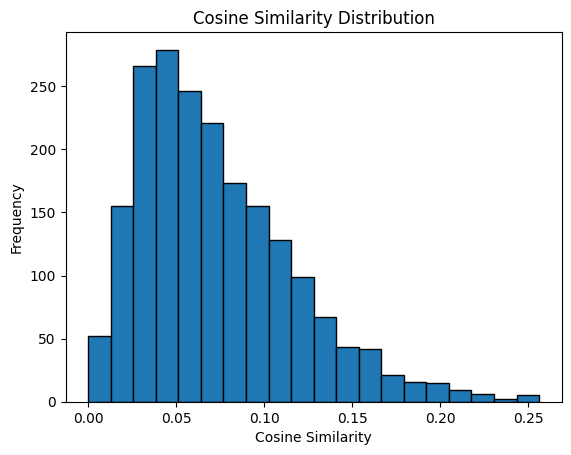

Mean cosine similarity: 0.07305015896751046
Median cosine similarity: 0.06420163576817815


In [289]:
# visualize cosine similarity
plt.hist(tfidf_cosine_sim, bins=20, edgecolor='black')
plt.title('Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# mean and median of cosine similarity
print(f"Mean cosine similarity: {np.mean(tfidf_cosine_sim)}")
print(f"Median cosine similarity: {np.median(tfidf_cosine_sim)}")


In [290]:
jaccard_scores = final_df["jaccard"]

print("Jaccard Similarity Scores:")
print(jaccard_scores[:10])


Jaccard Similarity Scores:
0    0.062284
1    0.049505
2    0.067669
3    0.066079
4    0.030675
5    0.063584
6    0.033613
7    0.064846
8    0.038961
9    0.043689
Name: jaccard, dtype: float64


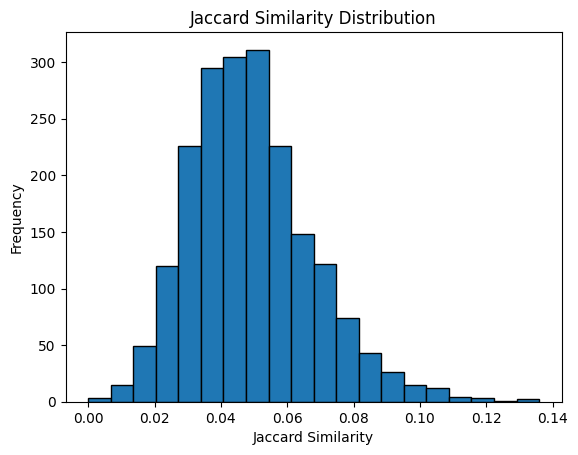

Mean jaccard similarity: 0.04911329753473298
Median jaccard similarity: 0.047209931170108146


In [292]:
# visualize cosine similarity
plt.hist(jaccard_scores, bins=20, edgecolor='black')
plt.title('Jaccard Similarity Distribution')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.show()

# mean and median of jaccard similarity
print(f"Mean jaccard similarity: {np.mean(jaccard_scores)}")
print(f"Median jaccard similarity: {np.median(jaccard_scores)}")


BERT Cosine Similarity Scores:
0    0.627379
1    0.552868
2    0.793586
3    0.694158
4    0.469606
5    0.664020
6    0.335701
7    0.496739
8    0.444519
9    0.596435
Name: bert_similarity, dtype: float64


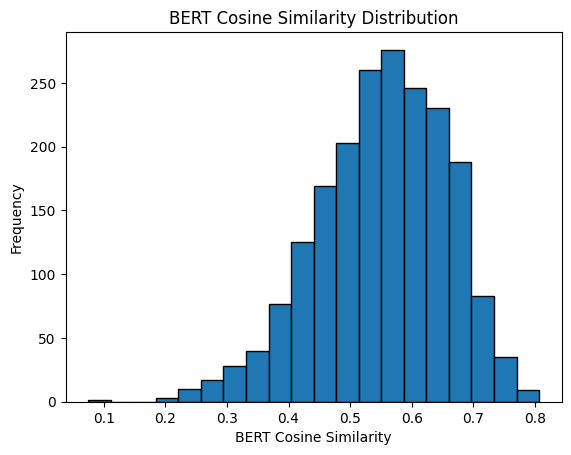

Mean BERT similarity: 0.5516305777949999
Median BERT similarity: 0.55775515


In [293]:
bert_similarities = final_df["bert_similarity"]

# Print the BERT cosine similarity scores for inspection
print("BERT Cosine Similarity Scores:")
print(bert_similarities[:10])

# visualize cosine similarity
plt.hist(bert_similarities, bins=20, edgecolor='black')
plt.title('BERT Cosine Similarity Distribution')
plt.xlabel('BERT Cosine Similarity')
plt.ylabel('Frequency')
plt.show()
# mean and median of bert similarity
print(f"Mean BERT similarity: {np.mean(bert_similarities)}")
print(f"Median BERT similarity: {np.median(bert_similarities)}")

0       0.020333
1       0.014493
2       0.023327
3       0.019653
4       0.008818
          ...   
1995    0.010693
1996    0.017013
1997    0.015674
1998    0.016729
1999    0.007782
Name: ngram_overlap, Length: 2000, dtype: float64


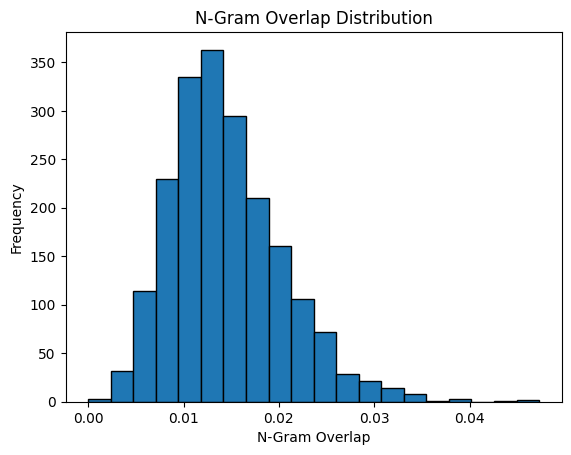

Mean ngram overlap: 0.014521580331642102
Median ngram overlap: 0.013706457925636


In [294]:
ngram_overlap_scores = final_df["ngram_overlap"]

print(ngram_overlap_scores)
# visualize ngram overlap
plt.hist(ngram_overlap_scores, bins=20, edgecolor='black')
plt.title('N-Gram Overlap Distribution')
plt.xlabel('N-Gram Overlap')
plt.ylabel('Frequency')
plt.show()
# mean and median of ngram overlap
print(f"Mean ngram overlap: {np.mean(ngram_overlap_scores)}")
print(f"Median ngram overlap: {np.median(ngram_overlap_scores)}")

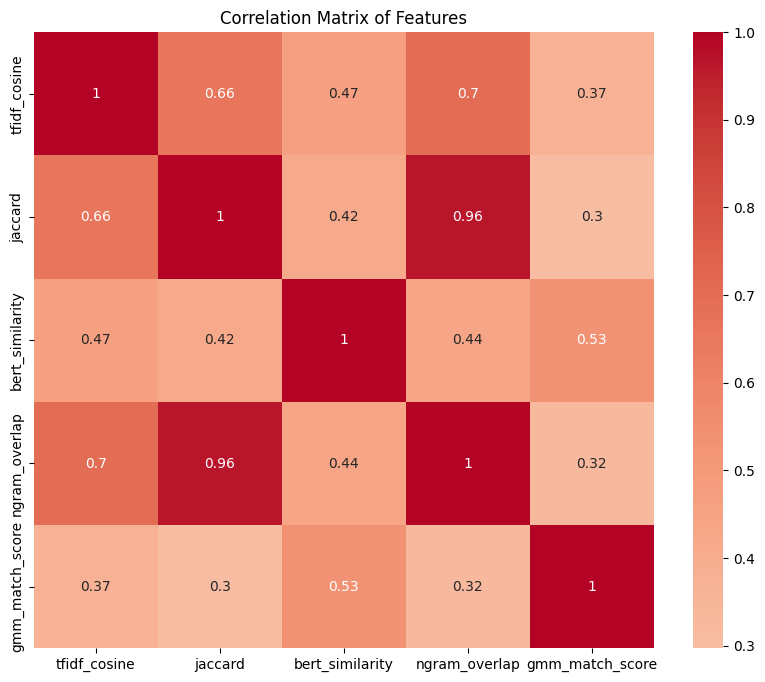

In [ ]:
import seaborn as sns
# correlation matrix
gmm_df_path = os.path.join(PROJECT_ROOT, "data/outputs/matched_resumes_jobs_withgmm.csv")

gmm_df = pd.read_csv(gmm_df_path)
correlation_matrix = gmm_df[["tfidf_cosine", "jaccard", "bert_similarity", "ngram_overlap", "gmm_match_score"]].corr()


# visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()
